## Determine Groups
This notebook is aimed at creating groups from our data in a data-drive way. Several methods will be experimented with till we find one that fits our data best.

In [34]:
# load the data in and check min, max, and counts
from pandas import DataFrame, Series, read_csv
import numpy as np

#project_home = '/home/camachocm2/Analysis/EmoGrow/temperament/'
project_home = '/home/camachocm2/Analysis/aggregate_anats/misc/'
#data_file = 'emogrow_cbq.csv'
data_file = project_home + 'subject_data_new.csv'
data = read_csv(data_file)
cbq_data= data.iloc[:,1:14]
cbq_data.describe()

,activity_level,anger_frustration,attention_focusing,discomfort,soothability,fear,high_intensity_pleasure,impulsivity,inhibitory_control,low_intensity_pleasure,perceptual_sensitivity,sadness,shyness
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,4.660450,4.138917,4.657194,4.008666,4.485528,3.597893,4.555609,4.302244,4.674306,5.252153,5.116167,4.121806,3.529667
std,1.022283,1.579407,1.226544,1.111455,1.171922,1.340095,1.210929,0.948785,1.127180,1.181800,1.000826,1.008628,1.150825
min,2.142857,1.000000,1.000000,1.333333,1.333333,0.833333,1.666667,2.000000,1.833333,2.000000,2.000000,1.428571,1.000000
25%,3.964286,3.000000,3.958333,3.166667,3.666667,2.500000,3.833333,3.666667,3.833333,4.468750,4.495000,3.428571,2.669167
50%,4.714286,3.833333,4.666667,3.833333,4.666667,3.500000,4.666667,4.333333,4.666667,5.562500,5.333333,4.142857,3.666667
75%,5.571429,5.666667,5.666667,4.833333,5.375000,4.500000,5.500000,4.965385,5.375000,6.125000,5.833333,4.857143,4.333333
max,6.714286,7.000000,7.000000,7.000000,7.000000,7.000000,6.833333,6.666667,7.000000,7.000000,7.000000,6.571429,6.333333


In [3]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(cbq_data)
std_cbq = std.fit_transform(cbq_data)
labels = []
for a in cbq_data.columns:
    labels.append(a + '_std')
std_cbq_data = DataFrame(data=std_cbq,columns=labels)
std_cbq_data.describe()

,activity_level_std,anger_frustration_std,attention_focusing_std,discomfort_std,soothability_std,fear_std,high_intensity_pleasure_std,impulsivity_std,inhibitory_control_std,low_intensity_pleasure_std,perceptual_sensitivity_std,sadness_std,shyness_std
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,-5.773160e-16,-2.331468e-16,-1.480297e-16,-2.886580e-16,-5.181041e-17,-8.881784e-17,5.884182e-16,-4.181840e-16,7.142435e-16,8.141636e-17,-1.628327e-16,-3.774758e-16,-7.401487e-18
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-2.473042e+00,-1.995735e+00,-2.994209e+00,-2.417147e+00,-2.701041e+00,-2.071607e+00,-2.395726e+00,-2.436692e+00,-2.530993e+00,-2.763401e+00,-3.126648e+00,-2.681392e+00,-2.207349e+00
25%,-6.838450e-01,-7.241274e-01,-5.721698e-01,-7.607414e-01,-7.016629e-01,-8.226997e-01,-5.989644e-01,-6.726940e-01,-7.492136e-01,-6.656687e-01,-6.232561e-01,-6.901862e-01,-7.508593e-01
50%,5.288332e-02,-1.942910e-01,7.755073e-03,-1.584121e-01,1.552137e-01,-7.335526e-02,9.209763e-02,3.290538e-02,-6.805438e-03,2.637065e-01,2.178971e-01,2.095875e-02,1.195441e-01
75%,8.948586e-01,9.713491e-01,8.264725e-01,7.450819e-01,7.621679e-01,6.759891e-01,7.831597e-01,7.018679e-01,6.242415e-01,7.416709e-01,7.195789e-01,7.321037e-01,7.012674e-01
max,2.017492e+00,1.819087e+00,1.918096e+00,2.702652e+00,2.154592e+00,2.549350e+00,1.888859e+00,2.502503e+00,2.071937e+00,1.485171e+00,1.890170e+00,2.438852e+00,2.446437e+00


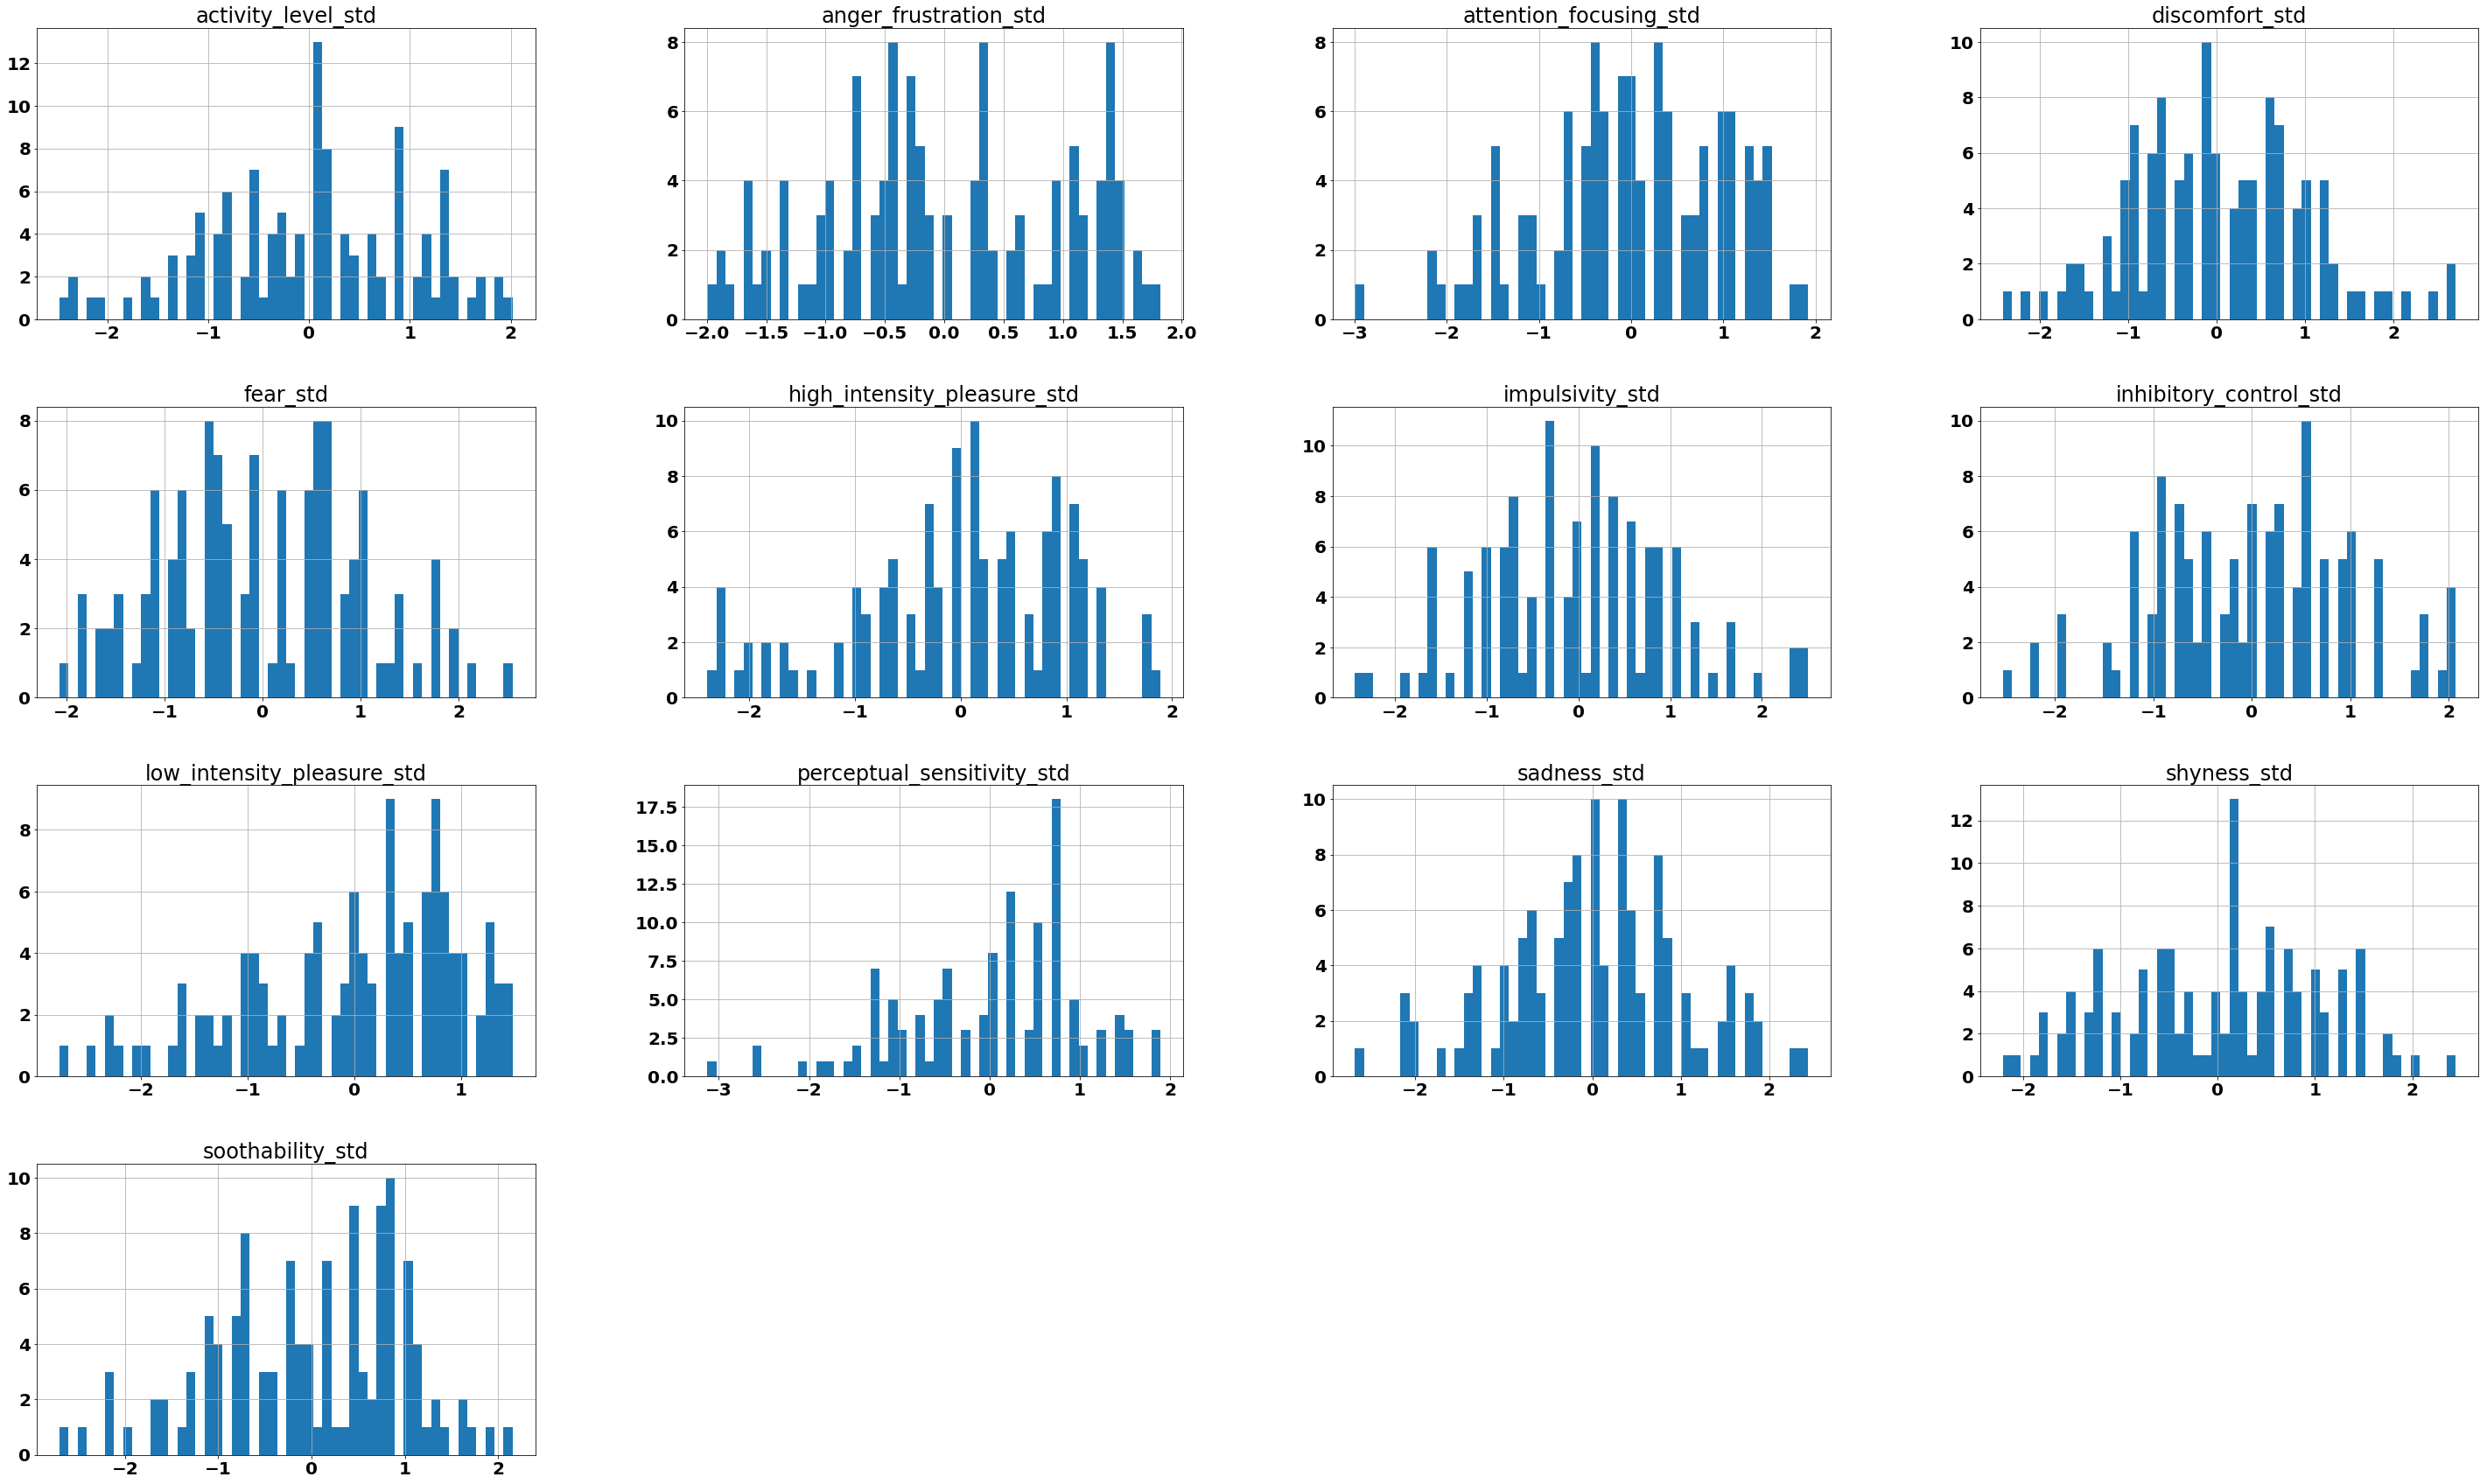

In [5]:
import matplotlib.pyplot as plt
import matplotlib

font = {'weight' : 'bold',
        'size'   : 20}

matplotlib.rc('font', **font)
std_cbq_data.hist(bins=50, figsize=(50,30))
plt.show()

In [6]:
# Decompose the data down to the principle components capturing 95% of the variance
from sklearn.decomposition import PCA
from numpy import sum

pca = PCA(random_state=0)
pca_fit = pca.fit_transform(std_cbq)
cbq_back=pca.inverse_transform(pca_fit)
#print(pca.components_)
print(pca.explained_variance_ratio_)
cbq_components = cbq_back[:,:3]
cbq_components.shape

[0.33873794 0.15463543 0.12472243 0.07971751 0.05137525 0.04796893
 0.04207157 0.03736025 0.03549238 0.02778366 0.02531239 0.02098115
 0.01384112]


(120, 3)

silhouette average for 2 clusters:0.3516098438931453
[-0.59484733  0.83278626] [ 0.57617887 -0.80665042]


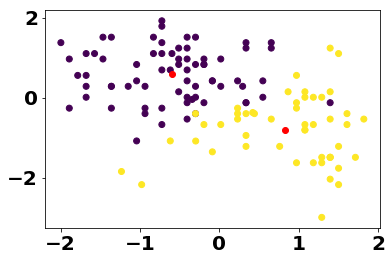

[70 50]


/usr/local/lib/python3.5/dist-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


silhouette average for 3 clusters:0.2602361297434851
[-0.91679519  0.92041855  0.01456087] [ 0.7148292  -1.21784783  0.27966849]


<Figure size 2880x720 with 0 Axes>

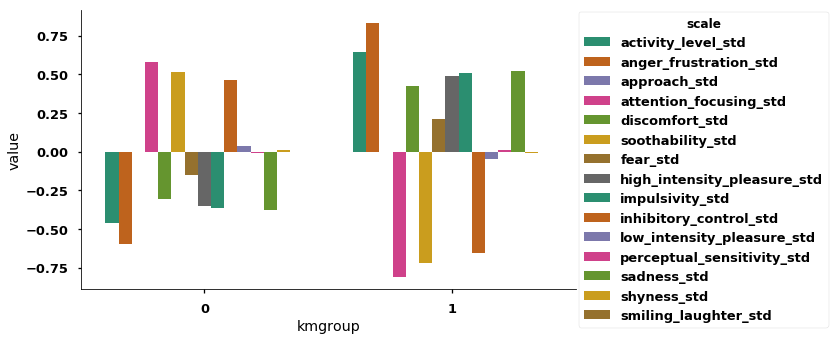

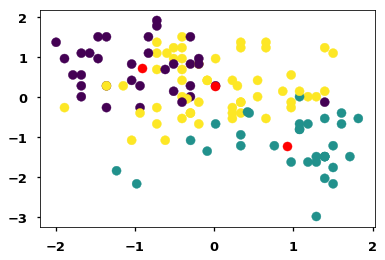

[33 32 55]


<Figure size 2880x720 with 0 Axes>

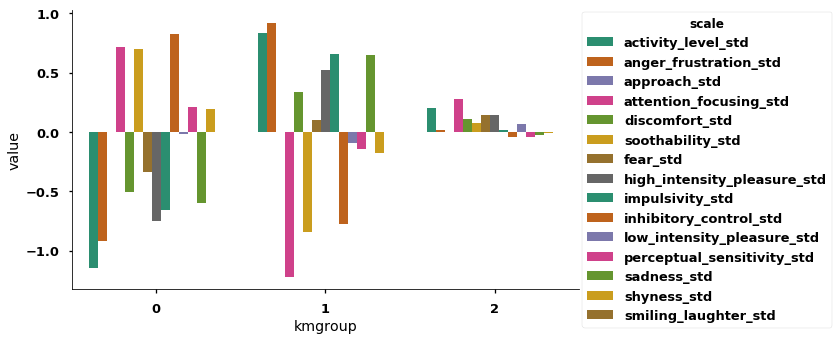

In [7]:
# Use K-means to cluster the data
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from numpy import unique

for n in [2,3]:
#for n in [3]:
    kmeans = KMeans(n_clusters=n, random_state=0, max_iter=500).fit(cbq_components)
    silhouette_avg = silhouette_score(cbq_components, kmeans.fit_predict(cbq_components))
    print('silhouette average for '+ str(n) + ' clusters:' + str(silhouette_avg))

    cluster_centers = kmeans.cluster_centers_
    print(cluster_centers[:,1],cluster_centers[:,2])
    plt.figure()
    plt.scatter(cbq_components[:,1],cbq_components[:,2], c=kmeans.labels_)
    plt.scatter(cluster_centers[:,1],cluster_centers[:,2], c='red')
    plt.savefig(project_home + str(n) + 'component_scatter.png')
    plt.show()
    
    groups = kmeans.labels_
    std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
    all_data = data.join(std_cbq_data)
    all_data.to_csv(project_home + str(n) + 'kmeans_group_data.csv')

    group_names, group_ns = unique(groups, return_counts=True)
    print(group_ns)

    std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
    std_cbq_data_m.to_csv(project_home + str(n) + 'kmeans_group_summary_data.csv')
    # Visualize the new groups
    import matplotlib.pyplot as plt
    import seaborn as sns
    from pandas import melt
    font = {'weight' : 'bold',
            'size'   : 10}

    matplotlib.rc('font', **font)
    sns.set_context("talk")

    long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                        value_vars=['activity_level_std', 'anger_frustration_std', 'approach_std',
                                    'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                    'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                    'inhibitory_control_std', 'low_intensity_pleasure_std',
                                    'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                    'smiling_laughter_std'], 
                        var_name='scale',
                        value_name='value')
    #long_std_cbq
    plt.figure(figsize=(40,10))
    
    sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
                   kind='bar',size=5,palette = 'Dark2', legend=True, aspect=1.75, ci=None)
    plt.savefig(project_home + str(n) + 'groups_plots.png',transparent=False)

In [8]:
groups = kmeans.labels_
std_cbq_data['kmgroup'] = Series(groups, index=None, name='kmgroup')
all_data = data.join(std_cbq_data)
all_data.to_csv(project_home + str(n) + 'kmeans_group_data.csv')

group_names, group_ns = unique(groups, return_counts=True)
print(group_ns)

std_cbq_data_m = std_cbq_data.groupby('kmgroup').mean()
std_cbq_data_m.to_csv(project_home + str(n) + 'kmeans_group_summary_data.csv')


[33 32 55]


In [16]:
from pandas import read_csv
from scipy.stats import ttest_ind, f_oneway

print('######  2 GROUPS  #####')
cbq_data = read_csv(project_home + '2kmeans_group_data.csv', index_col=0)
kmg0 = cbq_data[cbq_data['kmgroup']==0]
kmg1 = cbq_data[cbq_data['kmgroup']==1]

scales = ['activity_level','anger_frustration', 'attention_focusing',
          'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
          'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
          'perceptual_sensitivity', 'sadness', 'shyness']
for scale in scales:
    t,p=ttest_ind(kmg0[scale],kmg1[scale], equal_var=False)
    print('%s: the t-value is %f and the pvalue is %f' % (scale,t,p))
    
print('\n######  3 GROUPS  #####')
cbq_data = read_csv(project_home + '3kmeans_group_data.csv', index_col=0)
kmg0 = cbq_data[cbq_data['kmgroup']==0]
kmg1 = cbq_data[cbq_data['kmgroup']==1]
kmg2 = cbq_data[cbq_data['kmgroup']==2]

for scale in scales:
    f,p=f_oneway(kmg0[scale],kmg1[scale], kmg2[scale])
    print('%s: the f-stat is %f and the pvalue is %f' % (scale,f,p))

######  2 GROUPS  #####
activity_level: the t-value is -7.249584 and the pvalue is 0.000000
anger_frustration: the t-value is -10.740879 and the pvalue is 0.000000
attention_focusing: the t-value is 9.734232 and the pvalue is 0.000000
discomfort: the t-value is -4.158980 and the pvalue is 0.000067
soothability: the t-value is 8.033792 and the pvalue is 0.000000
fear: the t-value is -1.945153 and the pvalue is 0.054505
high_intensity_pleasure: the t-value is -5.156623 and the pvalue is 0.000001
impulsivity: the t-value is -4.957546 and the pvalue is 0.000003
inhibitory_control: the t-value is 7.298029 and the pvalue is 0.000000
low_intensity_pleasure: the t-value is 0.436942 and the pvalue is 0.663087
perceptual_sensitivity: the t-value is -0.107962 and the pvalue is 0.914238
sadness: the t-value is -5.267437 and the pvalue is 0.000001
shyness: the t-value is 0.102849 and the pvalue is 0.918264

######  3 GROUPS  #####
activity_level: the f-stat is 74.894112 and the pvalue is 0.000000
a

/usr/local/lib/python3.5/dist-packages/pandas/core/reshape/reshape.py:731: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  frame = frame.loc[:, id_vars + value_vars]
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


<Figure size 2880x720 with 0 Axes>

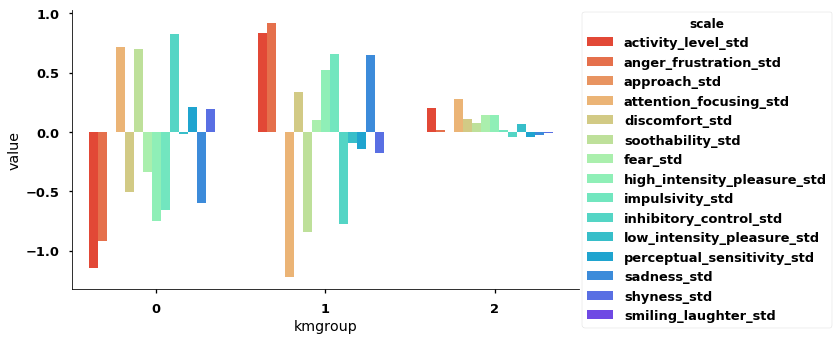

In [17]:
# Visualize the new groups
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import melt
font = {'weight' : 'bold',
        'size'   : 10}

matplotlib.rc('font', **font)
sns.set_context("talk")

long_std_cbq = melt(std_cbq_data, id_vars=['kmgroup'],
                    value_vars=['activity_level_std', 'anger_frustration_std', 'approach_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                'smiling_laughter_std'], 
                    var_name='scale',
                    value_name='value')
#long_std_cbq
plt.figure(figsize=(40,10))

sns.factorplot(x='kmgroup', y='value',hue='scale',data=long_std_cbq, 
               kind='bar',size=5,palette='rainbow_r',legend=True, aspect=1.75, ci=None)
plt.savefig(project_home + str(n) + 'groups_plots.png',transparent=False)


In [54]:
from pandas import merge
raw_data = read_csv('/home/camachocm2/Analysis/aggregate_anats/results/aseg_data_20180710-152600.csv', index_col=0)
usability_key = read_csv('/home/camachocm2/Analysis/aggregate_anats/misc/usability_20180710.csv', index_col=None)
cbq_data = read_csv(project_home + '3kmeans_group_data.csv', index_col=0)
subject_info = read_csv(project_home + 'subject_info.csv', index_col=None)

clean_data = raw_data[usability_key==1]
clean_data['freesurferID']=raw_data['freesurferID']
merged_data = clean_data.merge(cbq_data, on='freesurferID')
merged_data = merged_data.merge(subject_info, on='freesurferID')
merged_data.to_csv(project_home + 'combined_data_k3_20180710.csv')

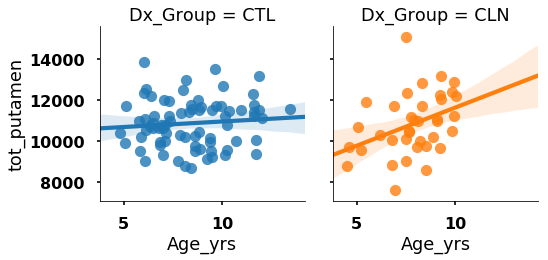

In [7]:
import matplotlib
from pandas import read_csv
import seaborn as sns
import matplotlib.pyplot as plt

project_home = '/home/camachocm2/Analysis/aggregate_anats/misc/'


font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

data = read_csv(project_home + 'combined_data_k2_20180710.csv', index_col=0)

data['tot_putamen'] = data['Right-Putamen'] + data['Left-Putamen']
sns.set_context("poster")
# Visualize results

sns.lmplot(x='Age_yrs',y='tot_putamen', col='Dx_Group', hue='Dx_Group', data=data, 
           ci=95, size=4)
#plt.savefig(project_home + 'tot_putamen_age_dx.png',transparent=True)
plt.show()

In [8]:
from pandas import read_csv, DataFrame, Series

data = read_csv(project_home + 'kmeans_group_data.csv', index_col=0)
data.describe()

,Age_yrs,male,sequence,eTIV,r_putamen,l_putamen,r_pallidum,l_pallidum,r_caudate,l_caudate,...,r_putamen_res,l_putamen_res,r_pallidum_res,l_pallidum_res,r_caudate_res,l_caudate_res,r_nacc_res,l_nacc_res,CBCL_intern,CBCL_extern
count,111.000000,111.000000,111.000000,1.110000e+02,105.000000,106.000000,109.000000,107.000000,108.000000,106.000000,...,1.050000e+02,1.060000e+02,1.090000e+02,1.070000e+02,1.080000e+02,1.060000e+02,1.110000e+02,1.110000e+02,105.000000,105.000000
mean,8.312732,0.513514,1.765766,1.484405e+06,5424.980952,5419.838679,1925.454128,2010.455140,3999.745370,3869.219811,...,-1.904762e-07,-2.319319e-14,3.669725e-07,-4.672897e-07,-5.555556e-07,-4.716981e-07,3.603604e-07,-3.603604e-07,7.123810,10.390476
std,1.754863,0.502084,0.785724,1.425070e+05,590.474287,656.886635,259.239939,247.947702,533.577684,496.978192,...,4.433281e+02,5.133177e+02,2.089390e+02,2.002803e+02,4.045909e+02,4.050412e+02,7.928006e+01,8.635923e+01,8.913791,12.709396
min,4.840520,0.000000,1.000000,1.142335e+06,4038.400000,3556.100000,1396.600000,1585.200000,2726.100000,2531.100000,...,-1.198418e+03,-1.319434e+03,-4.451497e+02,-4.582661e+02,-9.560202e+02,-8.001761e+02,-1.797758e+02,-2.241786e+02,0.000000,0.000000
25%,6.950034,0.000000,1.000000,1.385205e+06,4959.700000,4977.550000,1746.900000,1806.850000,3671.450000,3604.825000,...,-2.494381e+02,-3.730210e+02,-1.488958e+02,-1.507310e+02,-2.924882e+02,-2.820375e+02,-5.877619e+01,-5.646268e+01,1.000000,1.000000
50%,8.221766,1.000000,2.000000,1.488072e+06,5405.400000,5462.500000,1893.200000,1991.800000,4048.900000,3868.800000,...,2.608966e+01,9.008757e+01,-3.065441e+01,-2.861940e+00,-1.061407e+01,-2.582820e+01,3.632530e+00,-1.235434e+01,4.000000,4.000000
75%,9.400411,1.000000,2.000000,1.577459e+06,5874.700000,5788.050000,2102.300000,2197.350000,4278.500000,4079.000000,...,3.133490e+02,3.363175e+02,1.370403e+02,1.413415e+02,2.516263e+02,2.643743e+02,5.228468e+01,5.522980e+01,10.000000,18.000000
max,12.084873,1.000000,3.000000,1.943317e+06,6926.400000,6961.200000,2656.300000,2712.700000,5360.700000,5236.000000,...,8.325999e+02,1.026731e+03,6.512491e+02,5.159346e+02,9.423300e+02,9.238201e+02,2.232307e+02,2.220827e+02,47.000000,46.000000


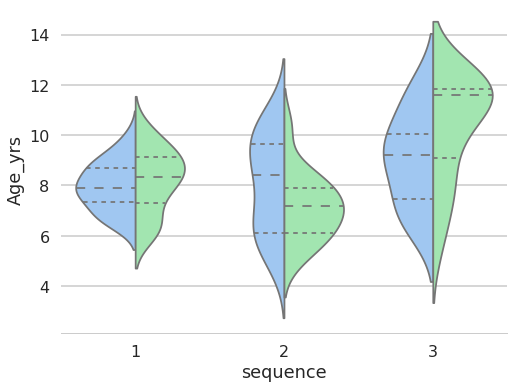

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("poster")

fig, ax = plt.subplots(figsize=(8,6))
sns.set(style="whitegrid",  palette="pastel", color_codes=True)
sns.violinplot(x="sequence", y="Age_yrs", hue="male", data=data, split=True,
               inner="quart")
sns.despine(left=True)
ax.legend_.remove()
plt.savefig(project_home + 'age_sex_sample.png')

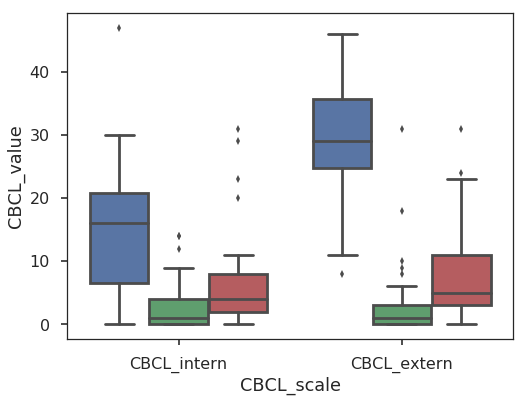

In [14]:
from pandas import melt
sns.set(style="ticks")
sns.set_context("poster")

long_cbcl = melt(data, id_vars=['SubjectID', 'Age_yrs', 'male', 'sequence', 'eTIV', 'r_putamen',
                                'l_putamen', 'r_pallidum', 'l_pallidum', 'r_caudate', 'l_caudate',
                                'r_thalamus', 'l_thalamus', 'r_nacc', 'l_nacc', 'activity_level',
                                'anger_frustration', 'approach', 'attention_focusing',
                                 'discomfort', 'soothability', 'fear', 'high_intensity_pleasure',
                                'impulsivity', 'inhibitory_control', 'low_intensity_pleasure',
                                'perceptual_sensitivity', 'sadness', 'shyness', 'smiling_laughter',
                                'activity_level_std', 'anger_frustration_std', 'approach_std',
                                'attention_focusing_std', 'discomfort_std', 'soothability_std',
                                'fear_std', 'high_intensity_pleasure_std', 'impulsivity_std',
                                'inhibitory_control_std', 'low_intensity_pleasure_std',
                                'perceptual_sensitivity_std', 'sadness_std', 'shyness_std',
                                'smiling_laughter_std', 'kmgroup', 'r_putamen_res',
                                'l_putamen_res', 'r_pallidum_res', 'l_pallidum_res',
                                'r_caudate_res', 'l_caudate_res', 'r_nacc_res', 'l_nacc_res'],
                    value_vars=['CBCL_intern', 'CBCL_extern'], 
                    var_name='CBCL_scale',
                    value_name='CBCL_value')
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='CBCL_scale', y='CBCL_value', data=long_cbcl, hue='kmgroup')
ax.legend_.remove()
plt.savefig(project_home + 'cbcl_groups.png')